In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
#plt.rcParams["font.family"] = "MetaPlusBold"

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
C_eB = 10 ** -10
C_eW = C_eB
C_eH = 10 ** -10
C_HB = 2 * 10 ** -10
C_HW = 10 ** -10
#Pick C_HD and C_HWB s.t. we can use the SM vev
C_HD = 10 ** -10
C_HWB = C_HD
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB

def diff_decay2(s, t, ml, C_eB, C_eW, C_AA, C_AZ, C_eH, SW, CW):
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    N4 = (e ** 4 * m ** 2) / (256 * np.pi ** 3 * sin ** 2 * m_W ** 2 * m_h ** 3)
    u = m_h ** 2 + 2 * m ** 2 - s - t
    den_1 = (t - m ** 2)
    den_2 = (u - m ** 2)
    p_1 = (9 * m ** 4 + m ** 2 * (-2 * s + t - 3 * u) + t * u) / den_1 ** 2
    p_2 = (9 * m ** 4 + m ** 2 * (-2 * s + u - 3 * t) + t * u) / den_2 ** 2
    p_3 = (34 * m ** 4 - 2 * m ** 2 * (8 * s + 5 * (u + t)) + 2 * (s + t) * (s + u)) / (den_1 * den_2)
    struc_4 = N4 * (p_1 + p_2 + p_3)
    
    f6_AA = (-64 * C_AA * ml ** 2 * m_W ** 2) / (v ** 2 * s * (t - ml ** 2) * (u - ml ** 2)) #1/v^2
    struc_6_AA = f6_AA * (-(t - ml ** 2) ** 3 - (u - ml ** 2) ** 3 + (t - ml ** 2) ** 2 * (u - ml ** 2) + (t - ml ** 2) * (u - ml ** 2) * (u - ml ** 2 - 4 * m_h ** 2) + 4 * ml ** 2 * (u + t - 2 * ml ** 2) ** 2)
    f8_AA = (64 * C_AA ** 2 * m_W ** 2 * SW ** 2) / s
    struc_8_AA = f8_AA * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f6_AZ = ((-8 * C_AZ * ml ** 2 * m_W ** 2 * SW ** 2 * (CW ** 2 - 3 * SW ** 2)) / (SW * CW * v ** 2 * (u - ml ** 2) * (t - ml ** 2))) * ((m_Z ** 2 - Gam_Z ** 2 - s) / ((m_Z ** 2 - Gam_Z ** 2 - s) ** 2 + 4 * m_Z ** 2 * Gam_Z ** 2)) #1/v^2
    struc_6_AZ = f6_AZ * (-(t - ml ** 2) ** 3 - (u - ml ** 2) ** 3 + (t - ml ** 2) ** 2 * (u - ml ** 2) + (t - ml ** 2) * (u - ml ** 2) * (u - ml ** 2 - 4 * m_h ** 2) + 4 * ml ** 2 * (u + t - 2 * ml ** 2) ** 2)
    f8_AZ = (2 * C_AZ ** 2 * m_W ** 2) / (CW ** 2 * (Gam_Z ** 2 * m_Z ** 2 + (m_Z ** 2 - s) ** 2))
    struc_8_AZ = f8_AZ * (CW ** 4 - 2 * CW ** 2 * SW ** 2 + 5 * SW ** 4) * s * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f8_AA_AZ = ((16 * C_AA * C_AZ * m_W ** 2 * SW * (1 - 4 * SW ** 2)) / (CW)) * ((m_Z ** 2 - Gam_Z ** 2 - s) / ((m_Z ** 2 - Gam_Z ** 2 - s) ** 2 + 4 * m_Z ** 2 * Gam_Z ** 2))
    struc_8_AA_AZ = f8_AA_AZ * ((u - ml ** 2) ** 2 + (t - ml ** 2) ** 2)
    
    f6_eH = (-16 * 2 ** 0.5 * ml * m_W ** 2 * SW ** 2 * C_eH) / (v * (u - ml ** 2) * (t - ml ** 2)) #1/v
    struc_6_eH = f6_eH * (2 * m_h ** 4 - 2 * m_h ** 2 * (u + t - 2 * ml ** 2) + (u + t - 2 * ml ** 2) ** 2)
    f8_eH = (8 * m_W ** 2 * SW ** 2 * v ** 2 * C_eH ** 2) / ((u - ml ** 2) * (t - ml ** 2)) #v^2
    struc_8_eH = f8_eH * (2 * m_h ** 4 - 2 * m_h ** 2 * (u + t - 2 * ml ** 2) + (u + t - 2 * ml ** 2) ** 2)
    
    f8_eBeW_o = 1 
    struc_8_eBeW_o = f8_eBeW_o * (- 16 * SW * m_h ** 2 * m_W * v * C_eH * (SW * C_eW - CW * C_eB)) #v
    
    struc_8_eBeW = 8 * (u - ml ** 2) * (t - ml ** 2) * (SW * C_eW - CW * C_eB) ** 2 
    
    f6_eBeW = (m_h ** 2 * m_W * SW * ml) / (v ** 2) #1/v^2
    struc_6_eBeW = f6_eBeW * (16 * 2 ** 0.5 + (8 * 2 ** 0.5 * ml * CW) / (u)) * (SW * C_eW - CW * C_eB)
    
    return struc_4 + N * (struc_6_AA + struc_6_AZ + struc_6_eH + struc_6_eBeW + struc_8_AA + struc_8_AZ + struc_8_eH + struc_8_AA_AZ + struc_8_eBeW + struc_8_eBeW_o)
#N * (ml / v) ** 2 * 
def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

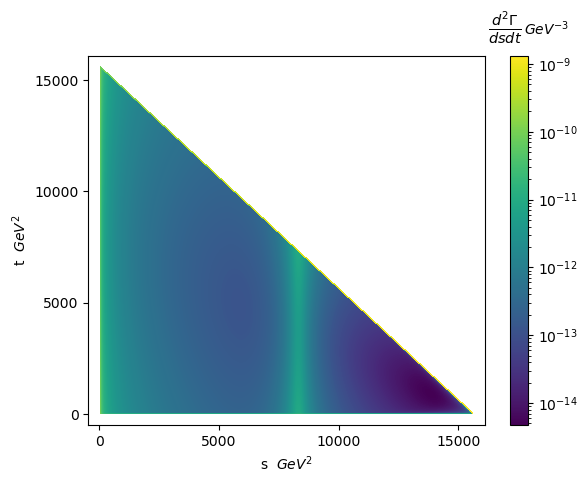

In [5]:
m = m_m
n = 500

E_phot_min = 0 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

C_HB = 2 * 10 ** -6
C_HW = 10 ** -6
C_HWB = C_HW
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB

x = ss_new
y = ts
z = diff_decay2(x, y, m, 0, 0, C_AA, C_AZ, 0, sin, cos)
n_levels = 500

fig, ax = plt.subplots()

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

#ps = ax.tricontourf(x, y, z, locator=ticker.LogLocator())
cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))
#cbar.minorticks_off()
plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(y.min(), y.max(), 5000))
plt.xticks(np.arange(0, x.max(), 5000))
ax.text(16.25 * 10 ** 3, 17 * 10 ** 3, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
ax.text(17.75 * 10 ** 3, 17 * 10 ** 3, r'$GeV^{-3}$', fontsize = 10)
ax.set(xlim=(x.min() - 500, x.max() + 500), ylim=(y.min() - 500, y.max() + 500))
#plt.savefig('Dalitz no cuts SM tree', dpi = 2000)
plt.show()

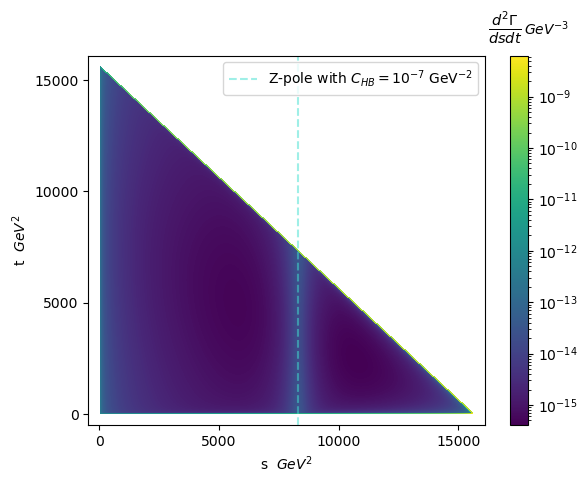

In [19]:
m = m_m
n = 500

E_phot_min = 0 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

C_eB = 0
C_eW = C_eB
C_eH = 0
C_HB = 10 ** -7
C_HW = 0
#Pick C_HD and C_HWB s.t. we can use the SM vev
C_HD = 0
C_HWB = 0
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB    
    
x = ss_new
y = ts
z = diff_decay2(x, y, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)
n_levels = 500

fig, ax = plt.subplots()

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

#ps = ax.tricontourf(x, y, z, locator=ticker.LogLocator())
cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))
#cbar.minorticks_off()
plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(y.min(), y.max(), 5000))
plt.xticks(np.arange(0, x.max(), 5000))
ax.text(16.25 * 10 ** 3, 17 * 10 ** 3, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
ax.text(17.75 * 10 ** 3, 17 * 10 ** 3, r'$GeV^{-3}$', fontsize = 10)
ax.set(xlim=(x.min() - 500, x.max() + 500), ylim=(y.min() - 500, y.max() + 500))
plt.axvline(m_Z ** 2, color = 'turquoise', linestyle = '--', alpha = 0.5, label = r'Z-pole with $C_{HB} = 10^{'+str(int(np.log10(C_HB)))+'}$ GeV$^{-2}$')
plt.legend()
plt.savefig('Dalitz no cuts SMEFT', dpi = 2000)
plt.show()

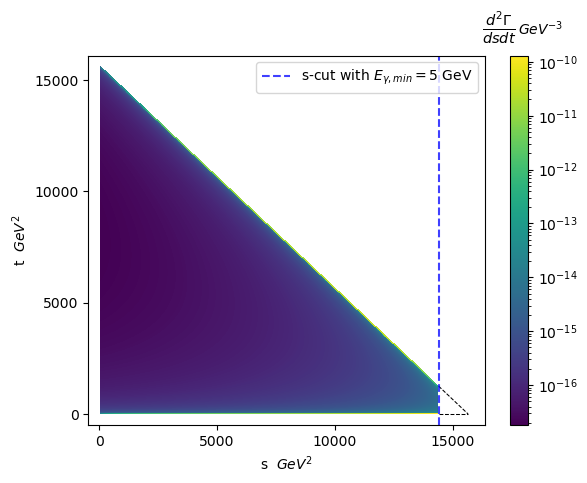

In [20]:
m = m_m
n = 500

E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

sps = np.linspace(s_max_fix, m_h ** 2, 200)
t_max_ps = t_max(sps, m)
t_min_ps = t_min(sps, m)

C_eB = 0
C_eW = C_eB
C_eH = 0
C_HB = 0
C_HW = 0
#Pick C_HD and C_HWB s.t. we can use the SM vev
C_HD = 0
C_HWB = 0
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB    
    
x = ss_new
y = ts
z = diff_decay2(x, y, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)
n_levels = 500

fig, ax = plt.subplots()

plt.plot(sps, t_max_ps, color = 'black', linestyle = '--', linewidth = 0.75)
plt.plot(sps, t_min_ps, color = 'black', linestyle = '--', linewidth = 0.75)

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())


cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))

plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(y.min(), y.max(), 5000))
plt.xticks(np.arange(0, m_h ** 2, 5000))
ax.text(16.25 * 10 ** 3, 17 * 10 ** 3, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
ax.text(17.75 * 10 ** 3, 17 * 10 ** 3, r'$GeV^{-3}$', fontsize = 10)
ax.set(xlim=(x.min() - 500, x.max() + 2000), ylim=(y.min() - 500, y.max() + 500))
plt.axvline(s_max_fix, color = 'blue', linestyle = '--', alpha = 0.75, label = r's-cut with $E_{\gamma, min} = $'+str(5)+' GeV')
plt.legend(loc = 'upper right')
plt.savefig('Dalitz s cut SM tree', dpi = 2000)
plt.show()

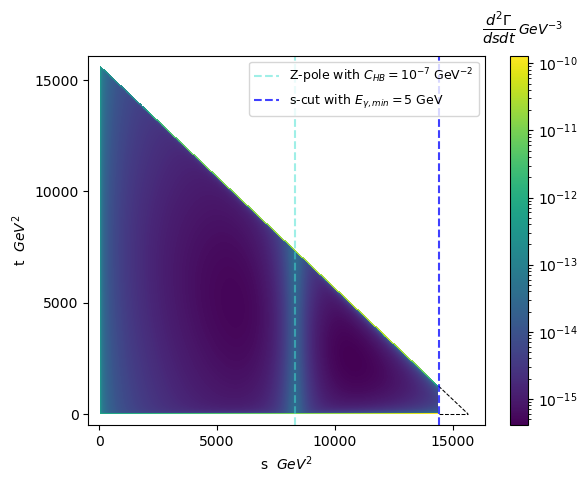

In [21]:
m = m_m
n = 500

E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

sps = np.linspace(s_max_fix, m_h ** 2, 200)
t_max_ps = t_max(sps, m)
t_min_ps = t_min(sps, m)

C_eB = 0
C_eW = C_eB
C_eH = 0
C_HB = 10 ** -7
C_HW = 0
#Pick C_HD and C_HWB s.t. we can use the SM vev
C_HD = 0
C_HWB = 0
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB    
    
x = ss_new
y = ts
z = diff_decay2(x, y, m, C_eB, C_eW, C_AA, C_AZ, C_eH, sin, cos)
n_levels = 500

fig, ax = plt.subplots()

plt.plot(sps, t_max_ps, color = 'black', linestyle = '--', linewidth = 0.75)
plt.plot(sps, t_min_ps, color = 'black', linestyle = '--', linewidth = 0.75)

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())


cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))

plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(y.min(), y.max(), 5000))
plt.xticks(np.arange(0, m_h ** 2, 5000))
ax.text(16.25 * 10 ** 3, 17 * 10 ** 3, r'$\frac{d^{2}\Gamma}{dsdt}$', fontsize = 15)
ax.text(17.75 * 10 ** 3, 17 * 10 ** 3, r'$GeV^{-3}$', fontsize = 10)
ax.set(xlim=(x.min() - 500, x.max() + 2000), ylim=(y.min() - 500, y.max() + 500))
plt.axvline(m_Z ** 2, color = 'turquoise', linestyle = '--', alpha = 0.5, label = r'Z-pole with $C_{HB} = 10^{'+str(int(np.log10(C_HB)))+'}$ GeV$^{-2}$')
plt.axvline(s_max_fix, color = 'blue', linestyle = '--', alpha = 0.75, label = r's-cut with $E_{\gamma, min} = $'+str(5)+' GeV')
plt.legend(loc = 'upper right', fontsize = 9)
plt.savefig('Dalitz s cut SMEFT', dpi = 2000)
plt.show()

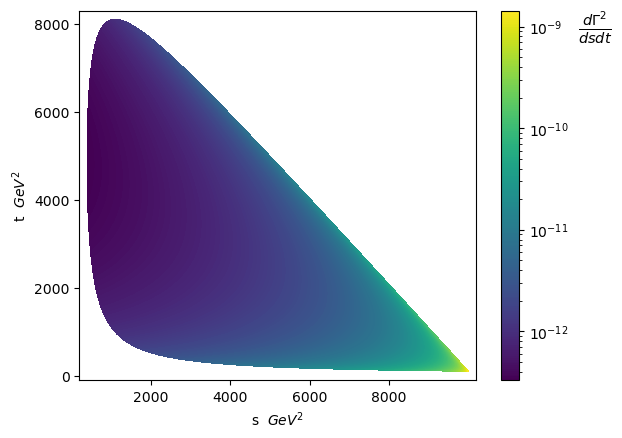

In [61]:
m = 10
m_h = 100
n = 1000

E_phot_min = 0 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

x = ss_new
y = ts
z = diff_decay2(x, y, m, 0, 0, 0, 0, 0, sin, cos)
n_levels = 200

fig, ax = plt.subplots()

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

#ps = ax.tricontourf(x, y, z, locator=ticker.LogLocator())
cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))
#cbar.minorticks_off()
plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(0, y.max(), 2000))
plt.xticks(np.arange(0, x.max(), 2000))
ax.text(12.75 * 10 ** 3, 7.75 * 10 ** 3, r'$\frac{d\Gamma^{2}}{dsdt}$', fontsize = 15)
ax.set(xlim=(x.min() - 200, x.max() + 200), ylim=(y.min() - 200, y.max() + 200))

plt.show()

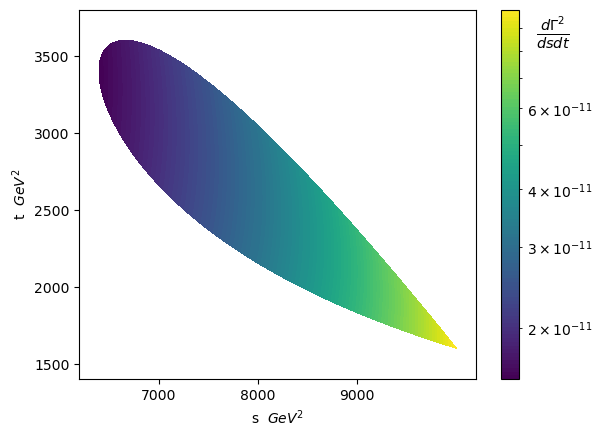

In [59]:
m = 40
m_h = 100
n = 1000

E_phot_min = 0 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2
step = (t_max_fix - t_min_fix) / n

ss = np.arange(s_min_fix, s_max_fix, (s_max_fix - s_min_fix) / n)
ss_new = np.array([])
ts = np.array([])
zips = []
for i in range(len(ss)):
    ts_arr = np.arange(t_min(ss[i], m), t_max(ss[i], m), step)
    ts = np.concatenate((ts, ts_arr), axis = 0)
    ss_arr = np.full(len(ts_arr), ss[i])
    ss_new = np.concatenate((ss_new, ss_arr), axis = 0)   

x = ss_new
y = ts
z = diff_decay2(x, y, m, 0, 0, 0, 0, 0, sin, cos)
n_levels = 100

fig, ax = plt.subplots()

ps = ax.tricontourf(x, y, z, np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator())

#ps = ax.tricontourf(x, y, z, locator=ticker.LogLocator())
cbar = fig.colorbar(ps)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))
#cbar.minorticks_off()
plt.xlabel(r's  $GeV^{2}$')
plt.ylabel(r't  $GeV^{2}$')
plt.yticks(np.arange(0, y.max(), 500))
plt.xticks(np.arange(0, x.max(), 1000))
ax.text(1.08 * 10 ** 4, 3.6 * 10 ** 3, r'$\frac{d\Gamma^{2}}{dsdt}$', fontsize = 15)
ax.set(xlim=(x.min() - 200, x.max() + 200), ylim=(y.min() - 200, y.max() + 200))

plt.show()